In [8]:
import pandas as pd 
import numpy as np


In [9]:
DLR=pd.read_csv("delivery_time.csv")
DLR.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [10]:
DLR.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [11]:
DLR.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [12]:
DLR.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [13]:
import warnings
warnings.filterwarnings('ignore')
DLR.mean()

Delivery Time    16.790952
Sorting Time      6.190476
dtype: float64

In [14]:
DLR.std()

Delivery Time    5.074901
Sorting Time     2.542028
dtype: float64

In [15]:
DLR.median()

Delivery Time    17.83
Sorting Time      6.00
dtype: float64

In [16]:
DLR.mode()

,Delivery Time,Sorting Time
0,8.00,7.0
1,9.50,NaN
2,10.75,NaN
3,11.50,NaN
4,12.03,NaN
5,13.50,NaN
6,13.75,NaN
7,14.88,NaN
8,15.35,NaN
9,16.68,NaN


In [17]:
DLR.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

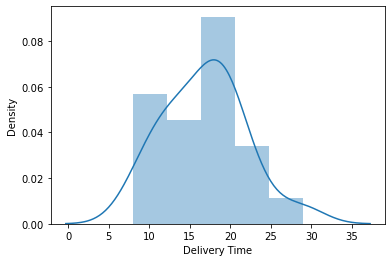

In [11]:
import seaborn as sns
sns.distplot(DLR['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

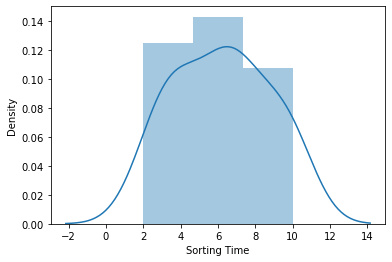

In [12]:
sns.distplot(DLR['Sorting Time'])

In [13]:
DLR=DLR.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
DLR

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [14]:
DLR.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

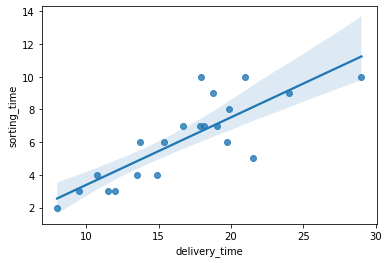

In [15]:
sns.regplot(x=DLR['delivery_time'],y=DLR['sorting_time'])

# Model-1

In [16]:
import statsmodels.formula.api as smf
model = smf.ols("delivery_time~sorting_time",data=DLR).fit()
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           3.98e-06
Time:                        10:09:54   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [19]:
model.resid_pearson

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [20]:
pred = model.predict(pd.DataFrame(DLR['sorting_time']))
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [21]:
rmse_line = np.sqrt(np.mean((np.array(DLR['delivery_time'])-np.array(pred))**2))
rmse_line

2.7916503270617654

In [22]:
pred.corr(DLR.delivery_time)

0.8259972607955325

Text(0.5, 1.0, 'First Model - 1')

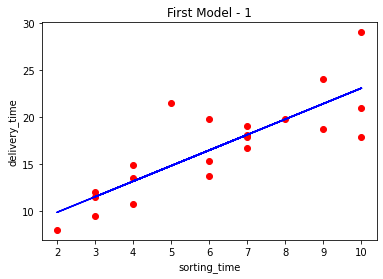

In [23]:
import matplotlib.pyplot as plt
plt.scatter(x=DLR['sorting_time'],y=DLR['delivery_time'],color='Red')
plt.plot(DLR['sorting_time'],pred,color='blue')
plt.xlabel('sorting_time')
plt.ylabel('delivery_time') 
plt.title('First Model - 1')

# Model-2

In [24]:
model2 = smf.ols("delivery_time~np.log(sorting_time)",data=DLR).fit()

In [25]:
model2.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [26]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           2.64e-06
Time:                        10:10:25   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model2.resid

0    -0.982913
1    -0.196517
2     2.386695
3     2.969906
4     7.017087
5    -2.013305
6     0.242646
7    -1.594889
8    -4.082913
9    -2.280094
10   -0.134933
11   -2.946517
12   -2.077354
13    0.405111
14    0.935111
15    1.183483
16   -3.613305
17   -0.647354
18    0.571900
19   -0.927354
20    5.785504
dtype: float64

In [28]:
model2.resid_pearson

array([-0.34207012, -0.06839109,  0.83061001,  1.0335774 ,  2.44206469,
       -0.70066414,  0.08444506, -0.55504813, -1.42092236, -0.79351107,
       -0.046959  , -1.02543743, -0.72295404,  0.14098557,  0.3254345 ,
        0.41187217, -1.2574911 , -0.22528994,  0.19903082, -0.32273466,
        2.01345289])

In [29]:
pred2 = model2.predict(pd.DataFrame(DLR['sorting_time']))
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [30]:
rmse_log = np.sqrt(np.mean((np.array(DLR['delivery_time'])-np.array(pred2))**2))
rmse_log

2.733171476682066

Text(0.5, 1.0, 'Model - 2')

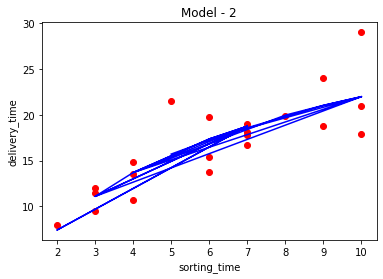

In [31]:
plt.scatter(x=DLR['sorting_time'],y=DLR['delivery_time'],color='Red')
plt.plot(DLR['sorting_time'],pred2,color='blue')
plt.xlabel('sorting_time')
plt.ylabel('delivery_time') 
plt.title('Model - 2')

# Model-3

In [32]:
model3 = smf.ols("np.log(delivery_time)~sorting_time",data=DLR).fit()

In [33]:
model3.params

Intercept       2.121372
sorting_time    0.105552
dtype: float64

In [34]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Thu, 08 Sep 2022   Prob (F-statistic):           1.59e-06
Time:                           10:10:36   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
pred_log=model3.predict(pd.DataFrame(DLR['sorting_time']))
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [36]:
pred3=np.exp(pred_log)
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [37]:
rmse_exp = np.sqrt(np.mean((np.array(DLR['delivery_time'])-np.array(pred3))**2))
rmse_exp

2.940250323056201

In [38]:
pred3.corr(DLR.delivery_time)

0.808578010828926

Text(0.5, 1.0, 'Model - 3')

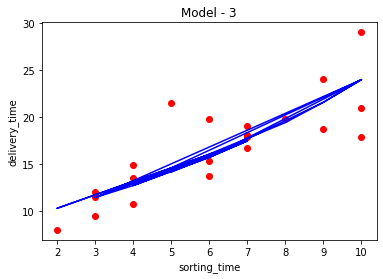

In [39]:
plt.scatter(x=DLR['sorting_time'],y=DLR['delivery_time'],color='Red')
plt.plot(DLR['sorting_time'],pred3,color='blue')
plt.xlabel('sorting_time')
plt.ylabel('delivery_time') 
plt.title('Model - 3')

Text(0, 0.5, 'Standardized Residual')

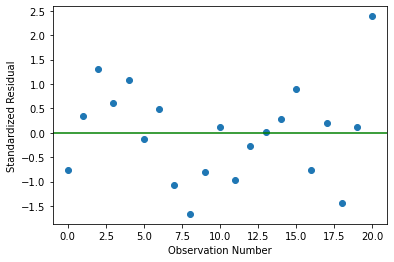

In [144]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

In [40]:
DLR['sorting_time_sq']=DLR.sorting_time*DLR.sorting_time 

# Model-4

In [44]:
model_quad = smf.ols("np.log(delivery_time)~sorting_time+sorting_time_sq",data=DLR).fit()
model_quad

In [45]:
model_quad.params

Intercept          1.699704
sorting_time       0.265922
sorting_time_sq   -0.012841
dtype: float64

In [47]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Thu, 08 Sep 2022   Prob (F-statistic):           2.20e-06
Time:                           10:12:31   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6997      0.228      7.441      0.000       1.220       2.180
sorting_time        0.2659      0.080      3.315      0.004       0.097       0.434
sorting_time_sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
model_quad.resid_pearson

array([-0.18653701,  0.27510944,  0.92331151,  0.76937448,  1.79789238,
       -0.62623272,  0.0766711 , -0.80301506, -1.16851536, -0.74833548,
       -0.11118848, -1.12531927, -0.72398172,  0.37160353,  0.64861345,
        0.8734897 , -1.3029903 , -0.21828016, -0.61938087, -0.31407821,
        2.21178906])

In [50]:
DLR.columns

Index(['delivery_time', 'sorting_time', 'sorting_time_sq'], dtype='object')

In [59]:
pred_quad = model_quad.predict(DLR)
pred4=np.exp(pred_quad)  
pred4


0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [ ]:
rmse_quad = np.sqrt(np.mean((np.array(DLR['delivery_time'])-np.array(pred4))**2))
rmse_quad 

Text(0.5, 1.0, 'Model - 4')

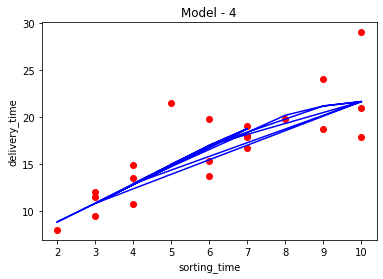

In [53]:
plt.scatter(x=DLR['sorting_time'],y=DLR['delivery_time'],color='Red')
plt.plot(DLR['sorting_time'],pred4,color='blue')
plt.xlabel('sorting_time')
plt.ylabel('delivery_time') 
plt.title('Model - 4')

(array([3., 5., 1., 4., 2., 2., 2., 0., 1., 1.]),
 array([-1.3029903 , -0.95151236, -0.60003442, -0.24855649,  0.10292145,
         0.45439938,  0.80587732,  1.15735525,  1.50883319,  1.86031113,
         2.21178906]),
 <BarContainer object of 10 artists>)

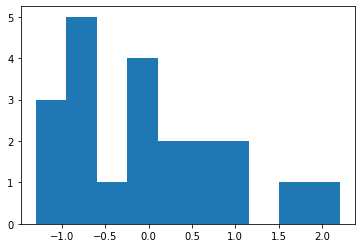

In [54]:
plt.hist(model_quad.resid_pearson)

In [55]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_line,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data)
table 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,2.791650,0.682271
1,rmse_log,2.733171,0.695443
2,rmse_exp,2.940250,0.710948
3,rmse_quad,2.799042,0.764867


# predict new data points

In [63]:
new_data=pd.DataFrame({'sorting_time':5,'sorting_time_sq':25},index=[1])

In [64]:
np.exp(model_quad.predict(new_data))

1    15.00373
dtype: float64

# Question-2

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns


In [2]:
SD=pd.read_csv("Salary_Data.csv")
SD.head

<bound method NDFrame.head of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [3]:
SD.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [4]:
SD.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [5]:
SD.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
SD.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [18]:
SD.mean()

YearsExperience        5.313333
Salary             76003.000000
dtype: float64

In [19]:
SD.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

In [20]:
SD.std()

YearsExperience        2.837888
Salary             27414.429785
dtype: float64

In [21]:
SD.columns

Index(['YearsExperience', 'Salary'], dtype='object')

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

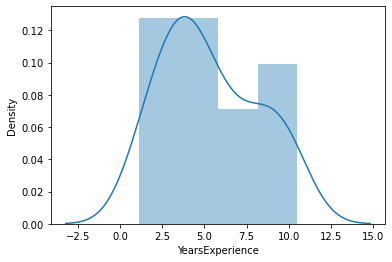

In [22]:
sns.distplot(SD['YearsExperience'])

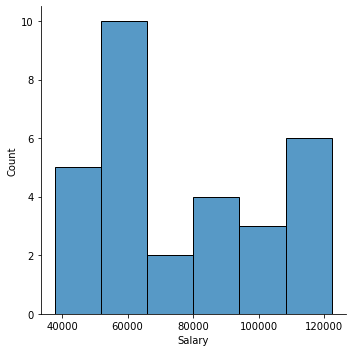

In [23]:
sns.displot(SD['Salary'])

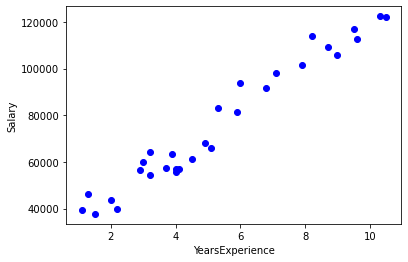

In [24]:
import matplotlib.pyplot as plt
plt.scatter(x=SD['YearsExperience'],y=SD['Salary'],color='blue')
plt.xlabel('YearsExperience')
plt.ylabel('Salary') 
plt.show()

In [26]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=SD).fit()
model

In [27]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           1.14e-20
Time:                        19:03:15   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [31]:
model.resid_pearson

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [33]:
pred = model.predict(pd.DataFrame(SD['YearsExperience']))
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

Text(0.5, 1.0, 'model - 1')

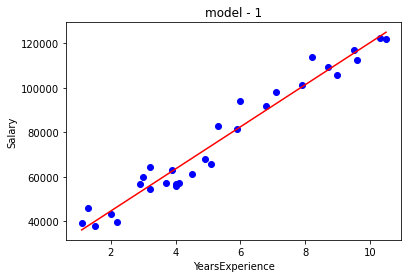

In [35]:
import matplotlib.pyplot as plt
plt.scatter(x=SD['YearsExperience'],y=SD['Salary'],color='blue')
plt.plot(SD['YearsExperience'],pred,color='red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('model - 1')

Text(0, 0.5, 'Standardized Residual')

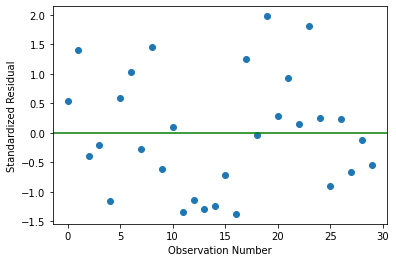

In [37]:
plt.plot(model.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

In [61]:
print(model.tvalues, '/n' ,model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 /n Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [62]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [59]:
new_data=pd.DataFrame({'YearsExperience':1.1},index=[1])

In [60]:
(model.predict(new_data))

1    36187.158752
dtype: float64